# HI profile classification using Convolutional Neural Networks, IAA-14 </center>
###                 *JAE Intro ICU at IAA, Granada Spain | By Gabriel Jaimes Illanes*

***
# PRE-PROCESING
# Step 1: Initial Data Download | ALFALFA - VIZIER

***

Data access link: https://vizier.unistra.fr/viz-bin/VizieR?-source=J/ApJ/861/49&-to=3

The 2019 ALFALFA catalog provides precise celestial coordinates, radial velocities, and noise measurements, unveiling the wonders of the extragalactic universe. With raw data in AGC format, astronomers can explore distant galaxies, while references like Simbad and NED provide additional context. This resource is a window into the vastness of the cosmos, ready to be explored for new cosmic discoveries.


    ALFALFA Raw data format: 
    **AGC    Name     ("h:m:s")  ("d:m:s") ("h:m:s")  ("d:m:s") km/s) /s) /s) /s) .km/s) km/s) SNR   (mJy) (Mpc) Mpc) sun]) sun]) I sp fits Simbad NED LEDA**



1. Installing all necesarry packages

In [177]:
!pip install astroquery
!pip install pandas
!pip install matplotlib
!pip install astropy
!pip install requests astropy
!pip install requests
!pip install beautifulsoup4


2. Following necesary libraries are loaded

In [170]:
from astroquery.vizier import Vizier
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin


3. Using *Vizier* Python library, route to ALFALFA data is defined, loaded into *pandas* and first 5 row displayed

In [176]:
route = "J/ApJ/861/49"               #First 50 rows are loaded
vizier = Vizier(columns=['*'])       #Access from Vizier Portal
data = vizier.get_catalogs(route)
data = data[0].to_pandas()           #Format to Panda

display(data.head())                 #First 5 Rows are shown



,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,HIflux,e_HIflux,SNR,rms,Dist,e_Dist,logMHI,e_logMHI,HI,sp,fits,Simbad,NED,LEDA
0,105367,,00 00 00.4,+05 26 36,00 00 00.8,+05 26 33,11983,274,39,281,1.14,0.08,8.1,1.91,166.000000,2.3,9.87,0.05,1,sp,fits,Simbad,NED,LEDA
1,333313,,00 00 00.9,+24 54 32,23 59 59.4,+24 54 27,11181,313,20,333,1.80,0.09,11.3,2.02,154.800003,2.3,10.01,0.05,1,sp,fits,Simbad,NED,LEDA
2,331060,478-009b,00 00 02.5,+23 05 05,00 00 03.4,+23 05 15,4463,160,4,184,1.96,0.07,14.7,2.35,50.599998,10.4,9.07,0.18,1,sp,fits,Simbad,NED,LEDA
3,331061,456-013,00 00 02.5,+15 52 20,00 00 02.1,+15 52 54,6007,260,45,268,1.13,0.09,6.5,2.40,85.199997,2.4,9.29,0.06,1,sp,fits,Simbad,NED,LEDA
4,104570,,00 00 01.6,+32 42 30,00 00 01.2,+32 42 37,10614,245,6,250,0.86,0.07,6.6,1.86,147.000000,2.3,9.64,0.06,1,sp,fits,Simbad,NED,LEDA


# Step 2: HI Emission Spectrum Download | ALFALFA - VIZIER
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**


1. Installing all necesarry packages

In [193]:
import re
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

2. Next, Spectrum data is downloaded on *.fits* format from *"ALFALFA extragalactic HI source catalog; corrected version: (August 2019)[spectrum/fits]spectrum"*.
Also located at Vizier directory *J/ApJ/861/49/sp*

In [129]:
folder_url = "http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/"  #From Vizier
save_directory = "sp"             #This is the new location of directory

response = requests.get(folder_url)
fits_links = re.findall(r'href=[\'"](.*?\.fits(?:\.gz)?)', response.text) #Se extraen los archivos con regex

os.makedirs(save_directory, exist_ok=True)

for link in fits_links:          #Iteration for downloading all .fits
    file_url = folder_url + link
    file_name = os.path.basename(link)
    print("Descargando:", file_url)
    with open(os.path.join(save_directory, file_name), 'wb') as f:
        f.write(requests.get(file_url).content)
    print("Descargado.")



Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000001.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000003.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000004.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000006.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000007.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000008.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000010.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000011.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000012.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000013.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000014.fits


KeyboardInterrupt: 

3. A sample spectrum is visualized. Here Flux vs Heliocentric Velocity is ploted: 


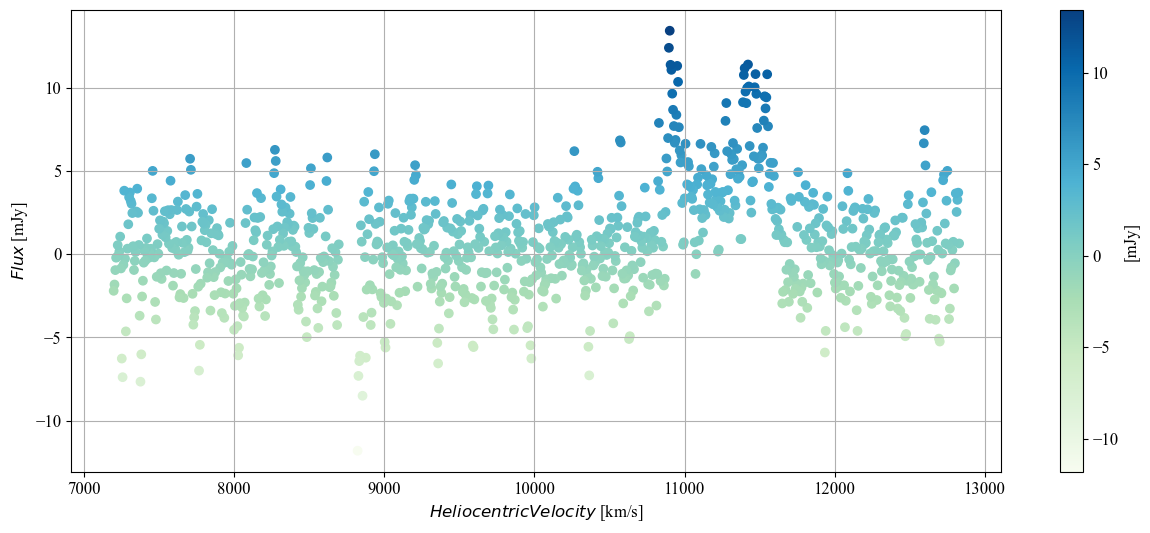

In [195]:
folder_path = "sp"                                       #Local location of /sp directory

fifth_spectrum_file = sorted([f for f in os.listdir(folder_path) if f.endswith('.fits')])[4]    #5th Spectrum as Example
file_path = os.path.join(folder_path, fifth_spectrum_file)
data = fits.getdata(file_path)

v_helio = data['VHELIO']                 # Heliocentric Velocity
flux = data['FLUX']                      # Flux

plt.figure(figsize=(15, 6))              #Plot of Spectrum
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric Velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.grid(True)
plt.show()


# Step 3: Statistics from spectrum data base | PYTHON 3.0
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**
